<a href="https://colab.research.google.com/github/alliwene/toyota-model-classifier/blob/main/eda_toyota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
import os, random, sys 
ROOT = "/content/drive"     # default location for the drive
drive.mount(ROOT) 

Mounted at /content/drive


In [24]:
# set file path
path = "/content/drive/My Drive/toyota_data"
os.chdir(path)
!ls 

count_per_class.png  model_resnext50_32x4d.pkl	ngrok-stable-linux-amd64.zip
image_per_brand.png  models			toyota-class.py
model_resnet101.pkl  ngrok			train


Import libraries

In [10]:
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from mpl_toolkits.axes_grid1 import ImageGrid
from keras.preprocessing import image 

In [11]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 16

sns.set_palette('muted',color_codes=True)
sns.set_context('notebook', font_scale=1.4)
vc_color = '#B5C9EB'

### Exploratory Data Analysis

Get labels and number of images in each label

In [25]:
labels = os.listdir('train')

res =  []
for label in labels:
    file_len = len(os.listdir('train/'+label))
    res.append([label,file_len])
    
df = pd.DataFrame(res, columns=['class','class_count'])  
df.head() 

,class,class_count
0,Sienna,132
1,Tacoma,127
2,Tundra,132
3,4Runner,135
4,Highlander,134


In [27]:
d2 = [int(item[1]) for item in res]
print(f'Total number of images: {sum(d2)}') 

Total number of images: 2283


Plot class count for all labels 

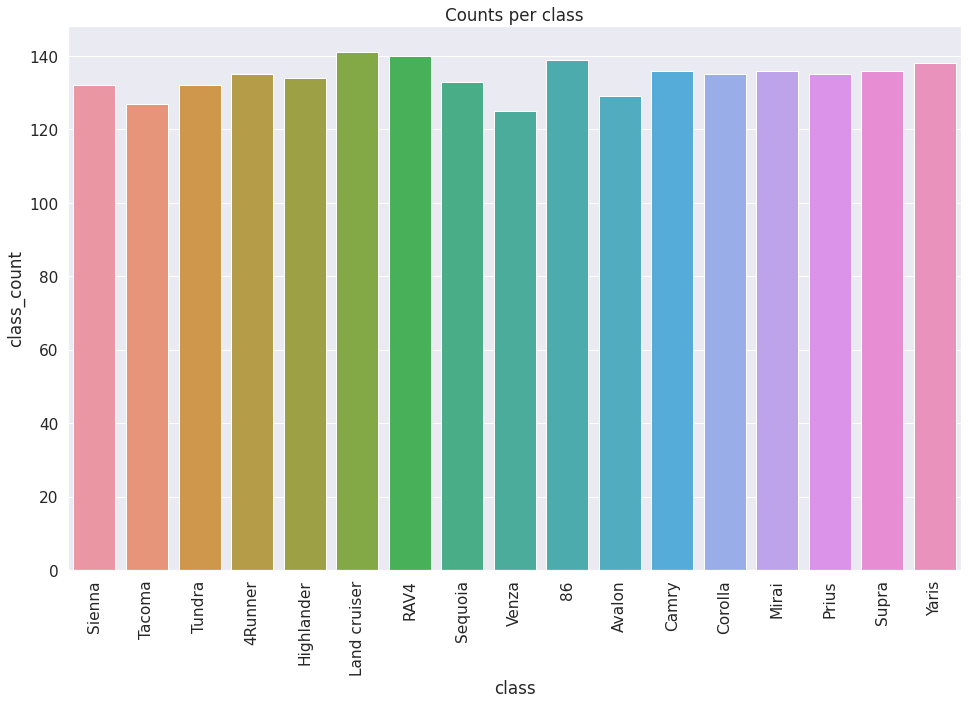

In [28]:
ax = sns.barplot('class', 'class_count', data=df)
for item in ax.get_xticklabels():
    item.set_rotation(90)
    
ax.set_title('Counts per class')
plt.savefig('count_per_class.png'); 

In [29]:
data_dir = "/content/drive/My Drive/toyota_data/train/" 

Get path and label for each training image

In [30]:
db = []
for label, class_name in enumerate(labels):
    pth = data_dir + class_name
    for file in os.listdir(pth):
        if not '.ini' in file:
            db.append(['{}/{}'.format(class_name, file), label, class_name])
db = pd.DataFrame(db, columns=['file', 'label', 'class_name'])
db.head()

,file,label,class_name
0,Sienna/00000007.jpg,0,Sienna
1,Sienna/00000005.jpg,0,Sienna
2,Sienna/00000004.jpg,0,Sienna
3,Sienna/00000000.jpg,0,Sienna
4,Sienna/00000002.jpg,0,Sienna


In [31]:
def read_img(filepath, size):
    img = image.load_img(data_dir + filepath, target_size=size)
    img = image.img_to_array(img)
    return img

Plot image from each class

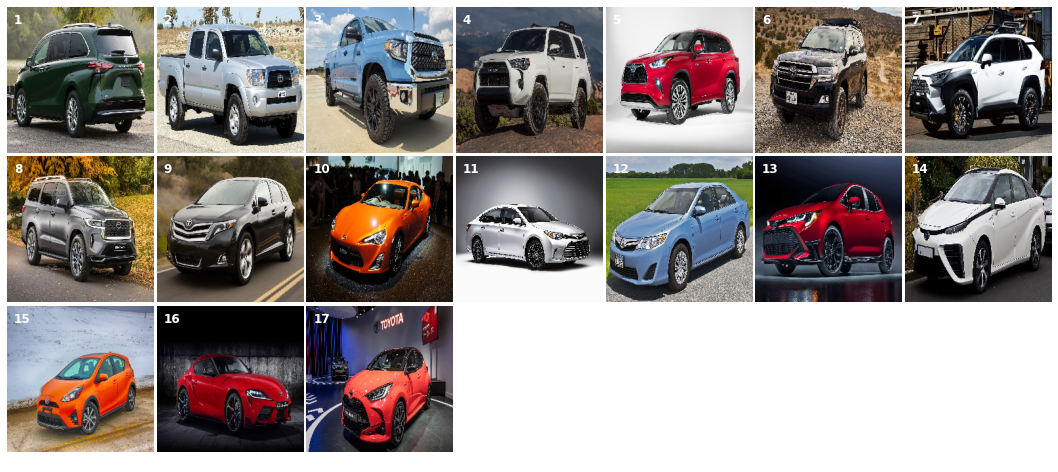

In [34]:
fig = plt.figure(1, figsize=(15, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(6, 7), axes_pad=0.05)

for i in range(42):
    ax = grid[i]
    ax.axis('off')
    if i < len(labels):
        class_name = labels[i]
        for filepath in db[db['class_name'] == class_name]['file'].values[:1]:
            img = read_img(filepath, (224, 224))
            ax.imshow(img / 255.)
            ax.annotate(i+1, xy=(10,25), color="white", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('image_per_brand.png');